In [14]:
import pandas as pd
import seaborn as sns

In [ ]:
# AUGMENTED BY CHAT GPT !

In [62]:
df = pd.read_csv('google_review_ratings.csv')

df = df.drop(columns = ['Unnamed: 25']).dropna()
df = df[(df != 0).all(axis=1)]


Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END ...................................lasso__alpha=0.3; total time=   0.0s
[CV] END ...................................lasso__alpha=0.3; total time=   0.0s
[CV] END ...................................lasso__alpha=0.3; total time=   0.0s
[CV] END ...................................lasso__alpha=0.3; total time=   0.0s
[CV] END ...................................lasso__alpha=0.3; total time=   0.0s
[CV] END .....................................lasso__alpha=1; total time=   0.0s
[CV] END .....................................las

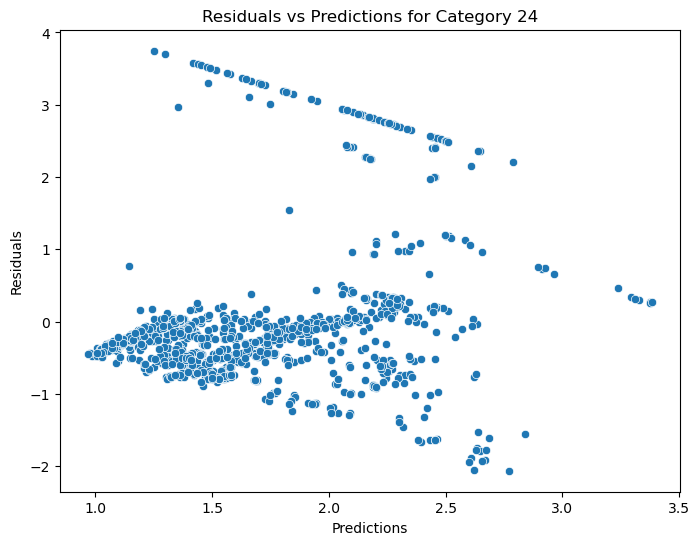

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

# List of categories
['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5', 'Category 6', 
 'Category 7', 'Category 8', 'Category 9', 'Category 10', 'Category 12', 
 'Category 13', 'Category 14', 'Category 15', 'Category 16', 'Category 17', 'Category 18', 
 'Category 19', 'Category 20', 'Category 21', 'Category 22', 'Category 23', 'Category 24']

# Loop through each category
for category in categories:
    # Train-test split
    features = df.drop(columns=[category, 'User']).dropna()
    X_train, X_test, y_train, y_test = train_test_split(features, df[category], test_size=0.3, random_state=101)
    
    # StandardScaler and Lasso
    scaler = StandardScaler()
    lasso_model = Lasso(max_iter=10000)
    
    # Pipeline with scaler and Lasso
    operations = [('scaler', scaler), ('lasso', lasso_model)]
    pipe = Pipeline(operations)
    
    # Parameter grid for GridSearchCV (hyperparameter tuning for alpha)
    param_grid = {
        'lasso__alpha': [ 0.165, 0.3, 1],
    }
    
    # GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    # Get best parameters and predictions
    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_test)

    feature_names = features.columns  # Get the column names

    lasso_model_best = best_model.named_steps['lasso']
    lasso_coefficients = lasso_model_best.coef_

    # Print out the feature names and their corresponding Lasso coefficients
    for feature, coef in zip(feature_names, lasso_coefficients):
        print(f"Feature: {feature}, Coefficient: {coef}")



    
    # Calculate residuals
    residuals = y_test - predictions
    
    # Create a new figure for each plot
    plt.figure(figsize=(8, 6))
    
    # Scatterplot for predictions vs residuals
    sns.scatterplot(x=predictions, y=residuals)
    
    # Set plot title and labels
    plt.title(f'Residuals vs Predictions for {category}')
    plt.xlabel('Predictions')
    plt.ylabel('Residuals')
    
    # Print the mean absolute error
    print(f'Mean Absolute Error for {category}: {sum(abs(residuals)) / len(residuals)}')
    
    # Show the plot
    plt.show()


Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .....................................lasso__alpha=1; total time=   0.0s
[CV] END .....................................lasso__alpha=1; total time=   0.0s
[CV] END .....................................lasso__alpha=1; total time=   0.0s
[CV] END .....................................lasso__alpha=1; total time=   0.0s
[CV] END .....................................lasso__alpha=1; total time=   0.0s
Feature: Category 1, Coefficient: 0.26995866387826173
Feature: Category 2, Coefficient: 0.0
Feature: Category 3, Coefficient: 0.0


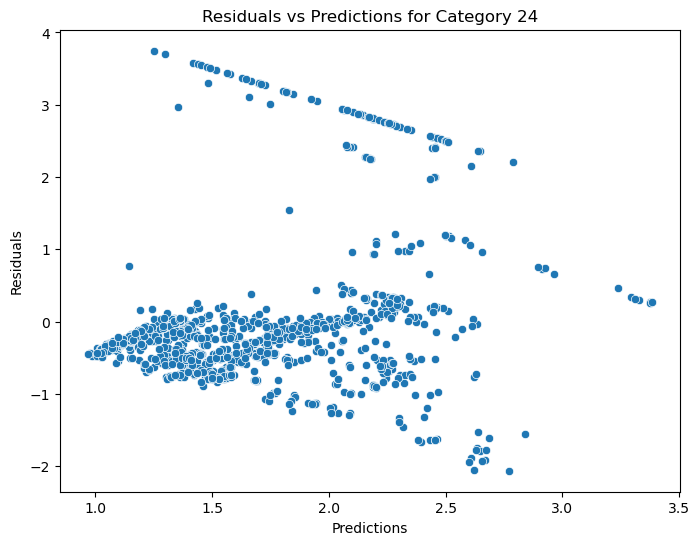

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

# List of categories
categories = ['Category 24']

# Loop through each category
for category in categories:
    # Train-test split
    features = df.drop(columns=[category, 'User']).dropna()
    X_train, X_test, y_train, y_test = train_test_split(features, df[category], test_size=0.3, random_state=101)
    
    # StandardScaler and Lasso
    scaler = StandardScaler()
    lasso_model = Lasso(max_iter=10000)
    
    # Pipeline with scaler and Lasso
    operations = [('scaler', scaler), ('lasso', lasso_model)]
    pipe = Pipeline(operations)
    
    # Parameter grid for GridSearchCV (hyperparameter tuning for alpha)
    param_grid = {
        'lasso__alpha': [ 0.165, 1],
    }
    
    # GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    # Get best parameters and predictions
    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_test)

    feature_names = features.columns  # Get the column names

    lasso_model_best = best_model.named_steps['lasso']
    lasso_coefficients = lasso_model_best.coef_

    # Print out the feature names and their corresponding Lasso coefficients
    for feature, coef in zip(feature_names, lasso_coefficients):
        print(f"Feature: {feature}, Coefficient: {coef}")



    
    # Calculate residuals
    residuals = y_test - predictions
    
    # Create a new figure for each plot
    plt.figure(figsize=(8, 6))
    
    # Scatterplot for predictions vs residuals
    sns.scatterplot(x=predictions, y=residuals)
    
    # Set plot title and labels
    plt.title(f'Residuals vs Predictions for {category}')
    plt.xlabel('Predictions')
    plt.ylabel('Residuals')
    
    # Print the mean absolute error
    print(f'Mean Absolute Error for {category}: {sum(abs(residuals)) / len(residuals)}')
    
    # Show the plot
    plt.show()


Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END .....................................lasso__alpha=1; total time=   0.0s
[CV] END .....................................las

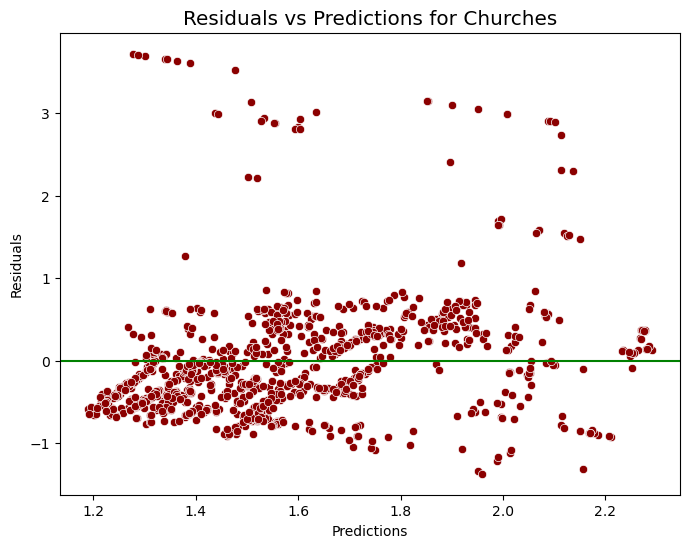

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END .....................................lasso__alpha=1; total time=   0.0s
[CV] END .....................................las

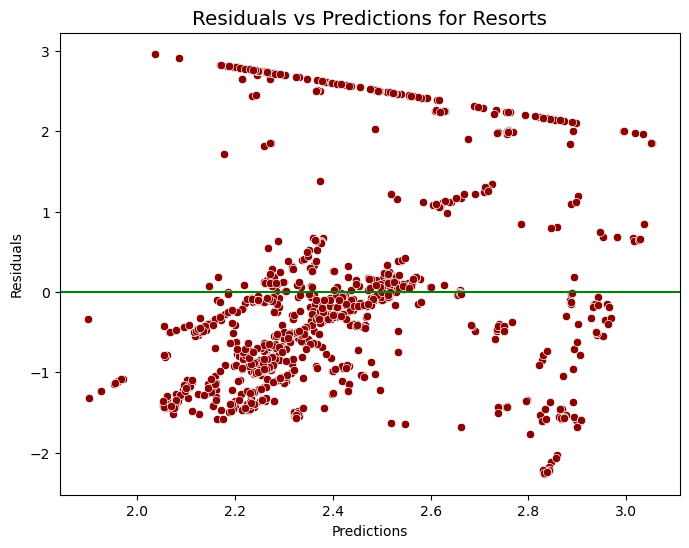

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END .....................................lasso__alpha=1; total time=   0.0s
[CV] END .....................................las

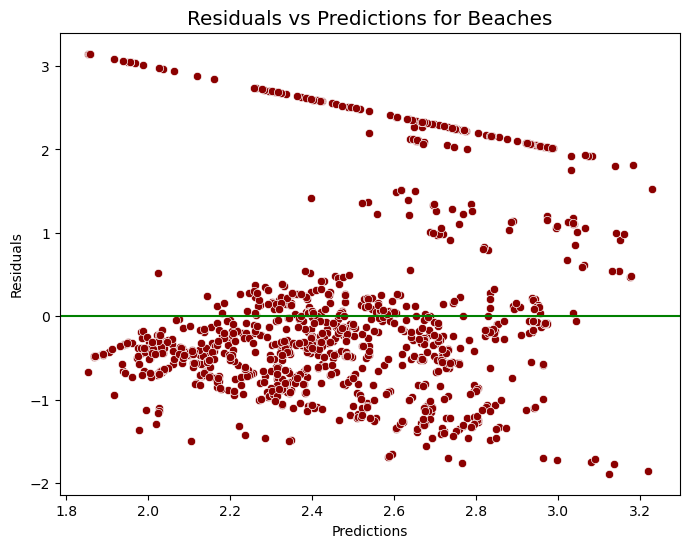

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END .....................................lasso__alpha=1; total time=   0.0s
[CV] END .....................................las

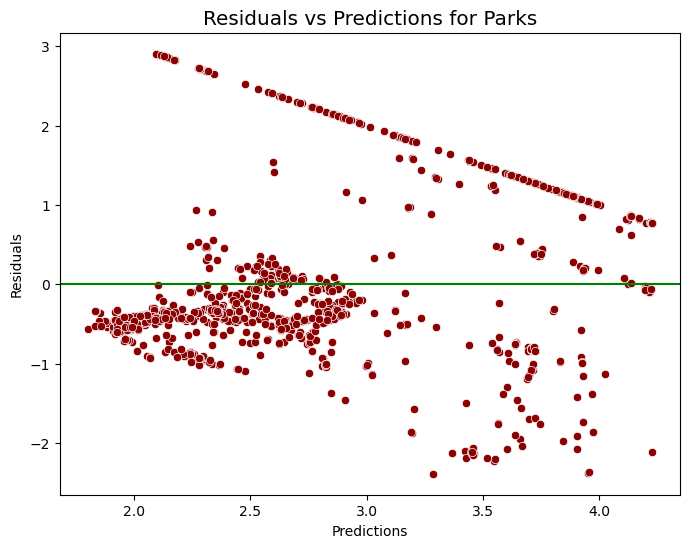

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END .....................................lasso__alpha=1; total time=   0.0s
[CV] END .....................................las

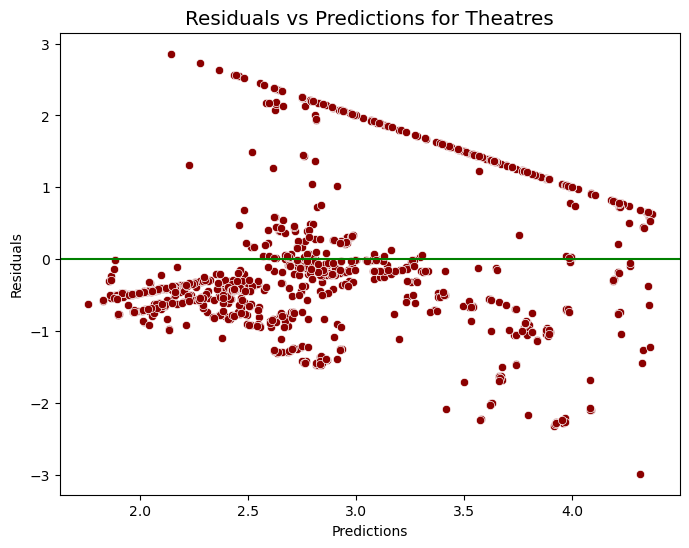

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END .....................................lasso__alpha=1; total time=   0.0s
[CV] END .....................................las

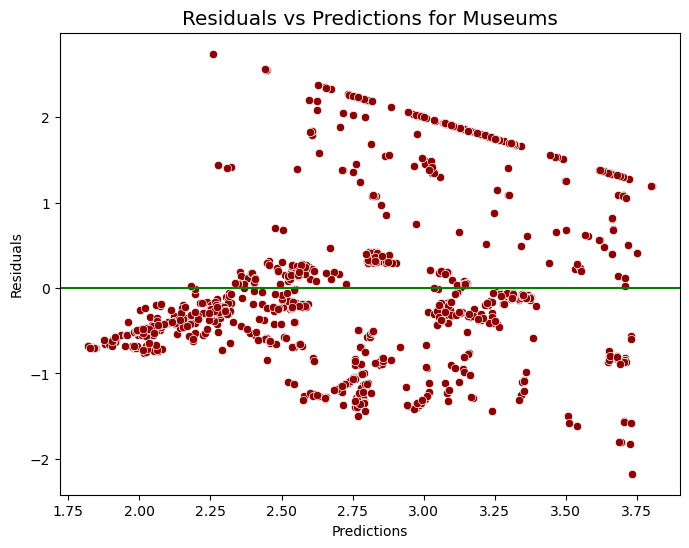

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END .....................................lasso__alpha=1; total time=   0.0s
[CV] END .....................................las

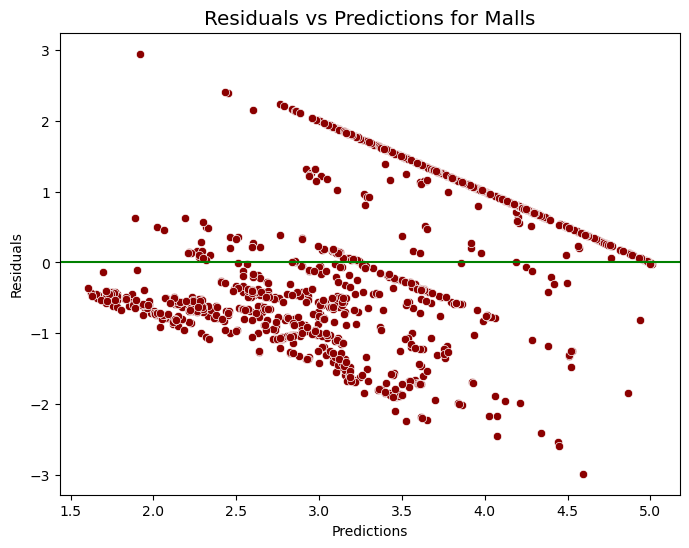

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END .....................................lasso__alpha=1; total time=   0.0s
[CV] END .....................................las

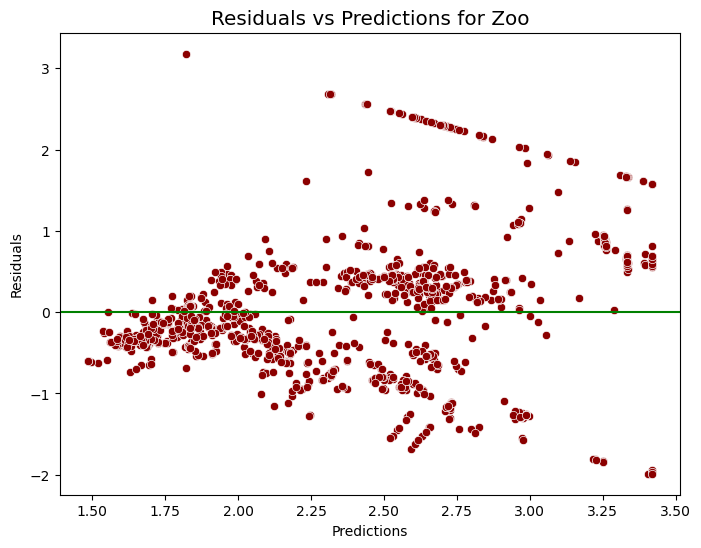

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END .....................................lasso__alpha=1; total time=   0.0s
[CV] END .....................................las

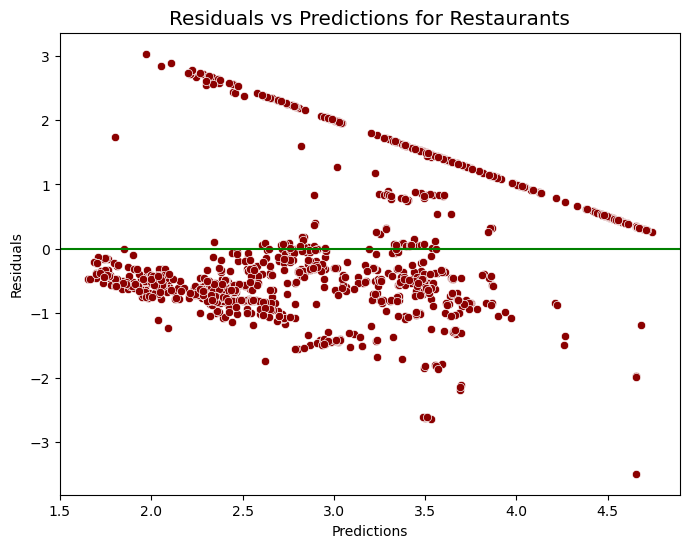

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END .....................................lasso__alpha=1; total time=   0.0s
[CV] END .....................................las

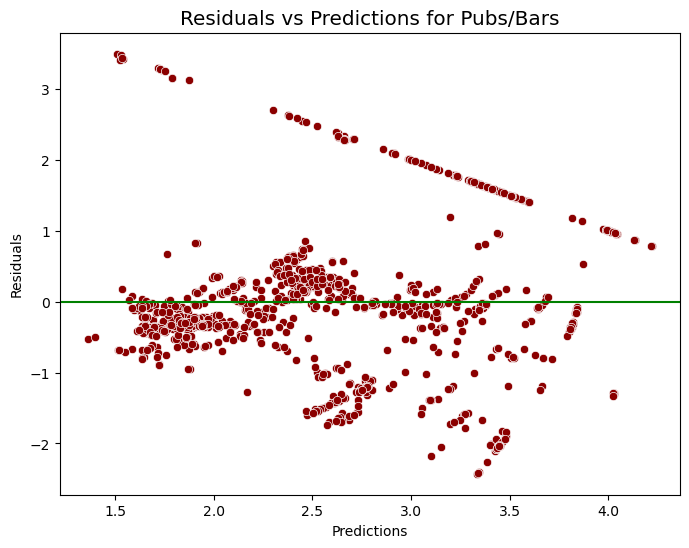

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END .....................................lasso__alpha=1; total time=   0.0s
[CV] END .....................................las

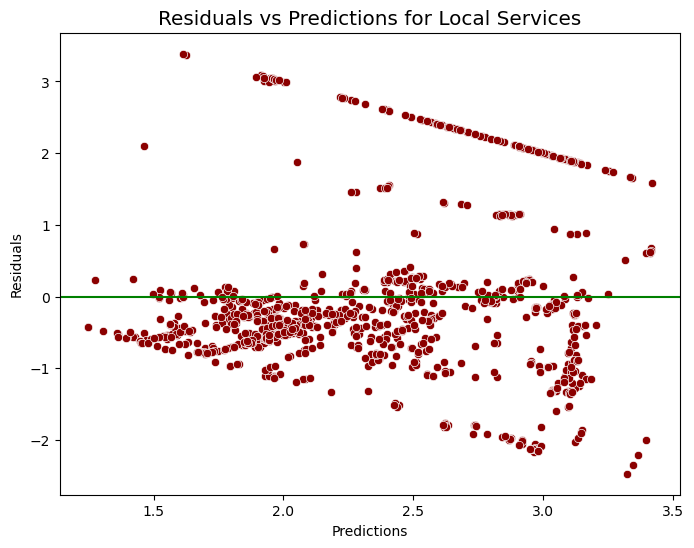

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END .....................................lasso__alpha=1; total time=   0.0s
[CV] END .....................................las

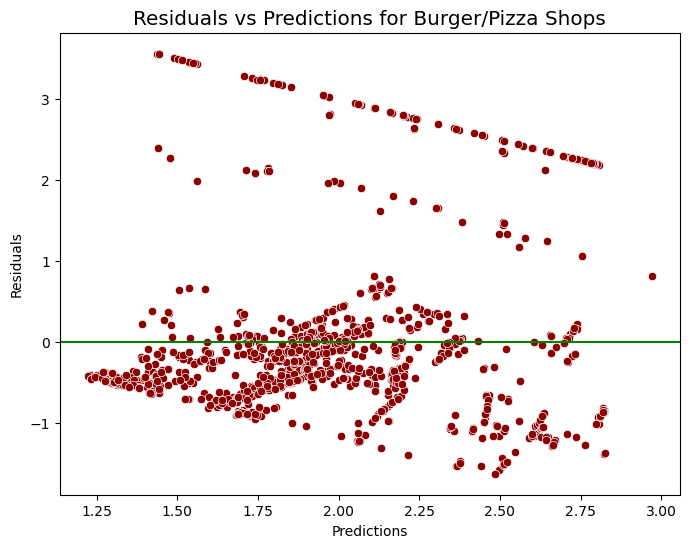

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END .....................................lasso__alpha=1; total time=   0.0s
[CV] END .....................................las

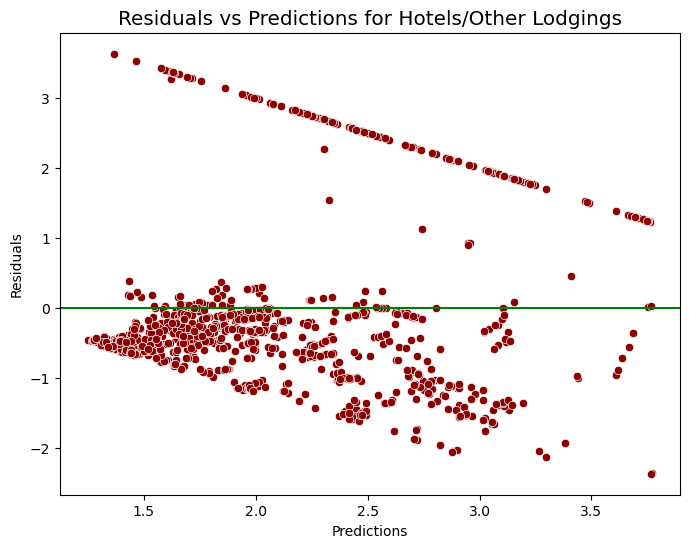

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END .....................................lasso__alpha=1; total time=   0.0s
[CV] END .....................................las

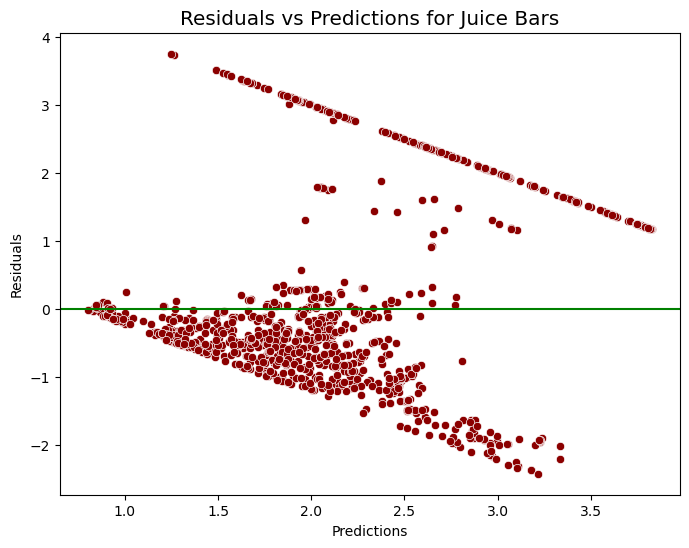

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END .....................................lasso__alpha=1; total time=   0.0s
[CV] END .....................................las

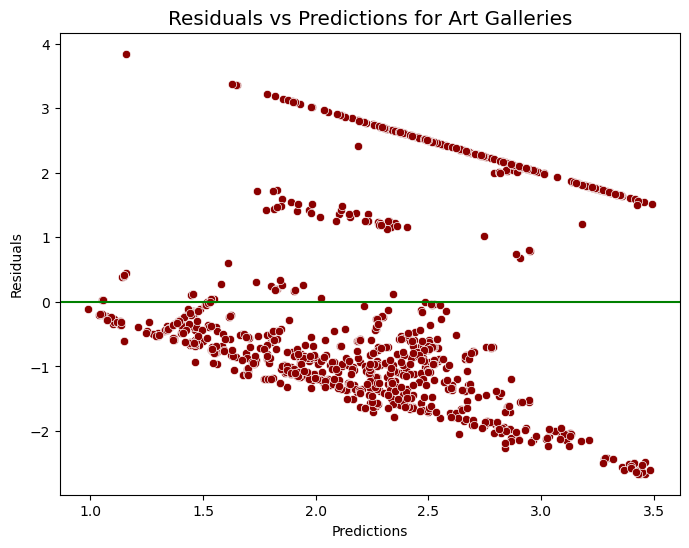

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END .....................................lasso__alpha=1; total time=   0.0s
[CV] END .....................................las

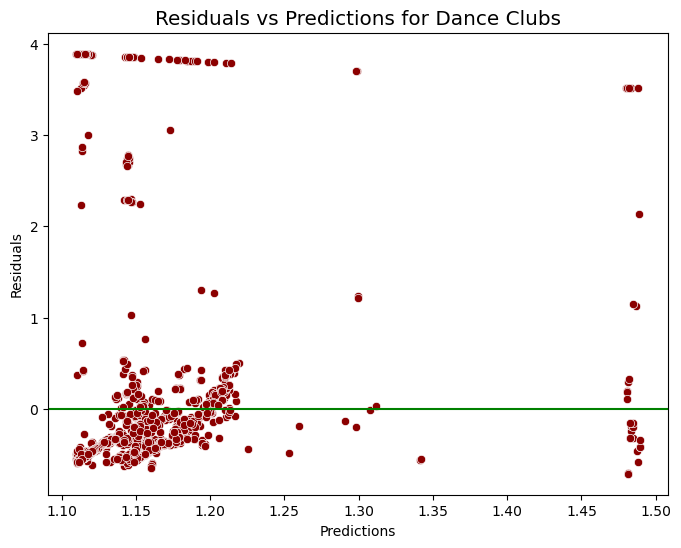

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END .....................................lasso__alpha=1; total time=   0.0s
[CV] END .....................................las

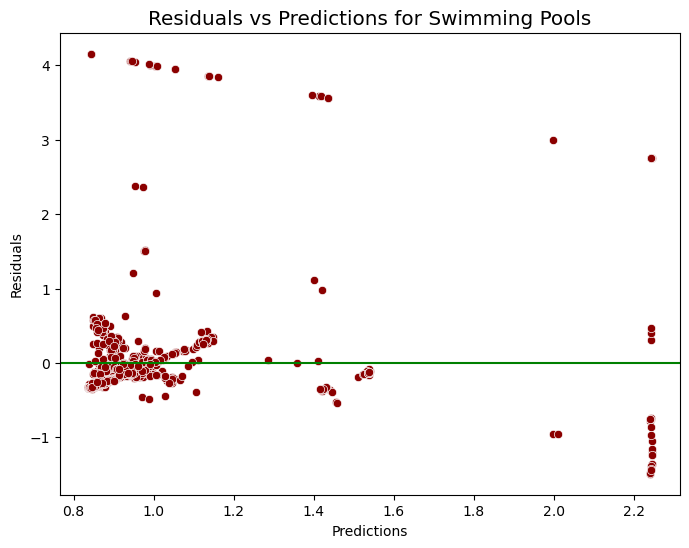

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END .....................................lasso__alpha=1; total time=   0.0s
[CV] END .....................................las

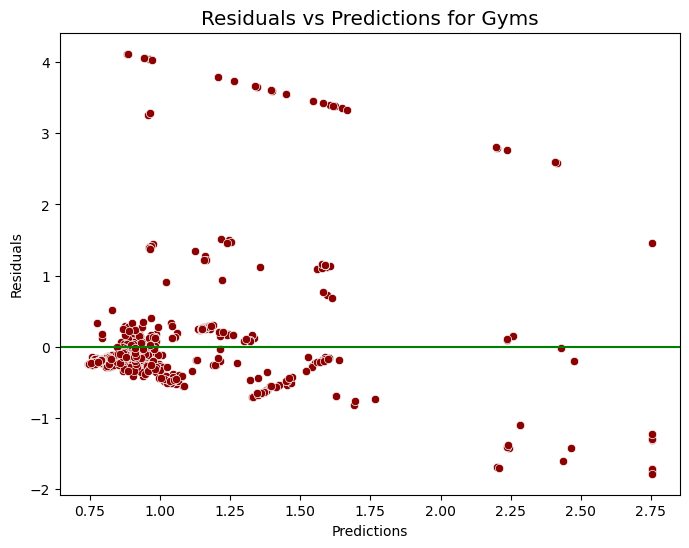

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END .....................................lasso__alpha=1; total time=   0.0s
[CV] END .....................................las

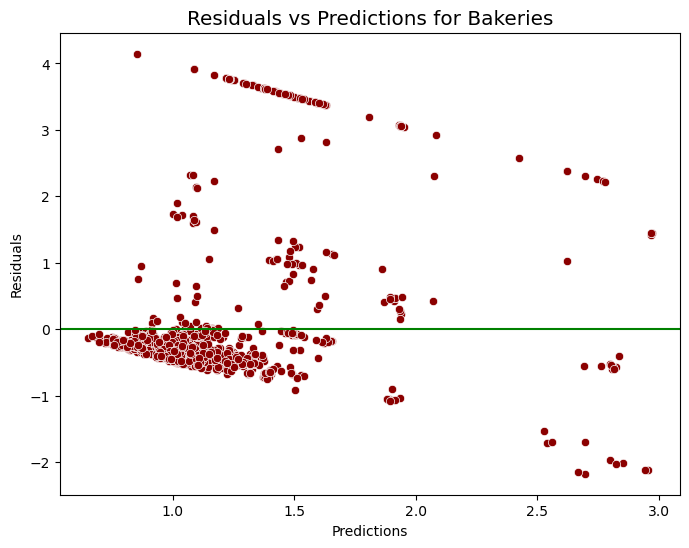

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END .....................................lasso__alpha=1; total time=   0.0s
[CV] END .....................................las

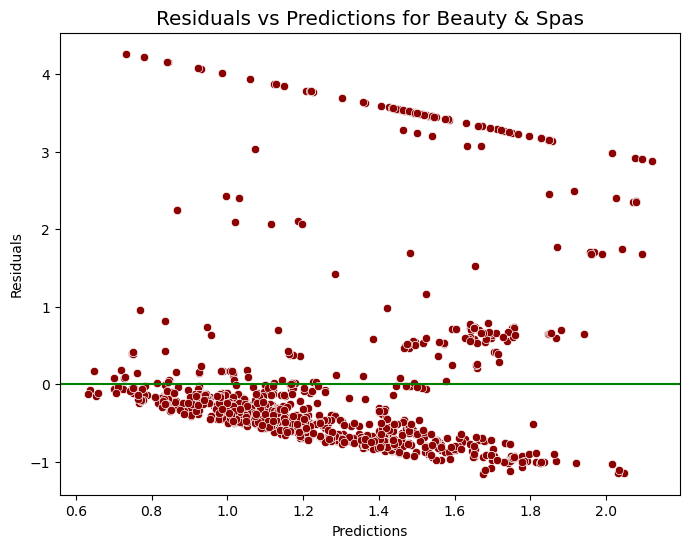

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END .....................................lasso__alpha=1; total time=   0.0s
[CV] END .....................................las

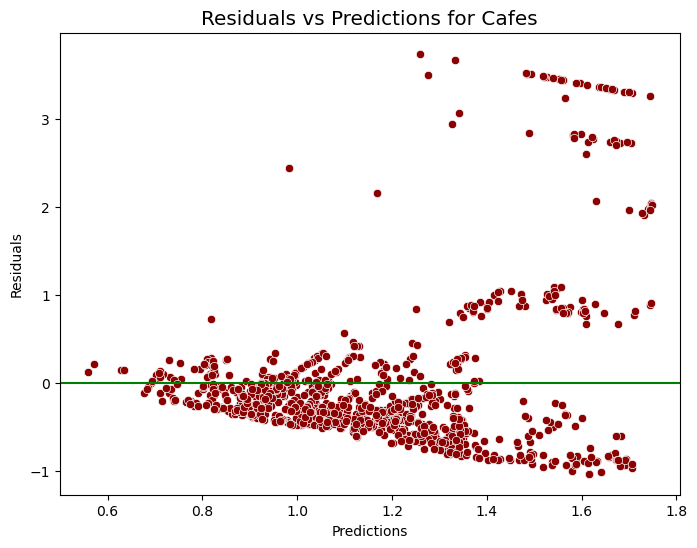

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END .....................................lasso__alpha=1; total time=   0.0s
[CV] END .....................................las

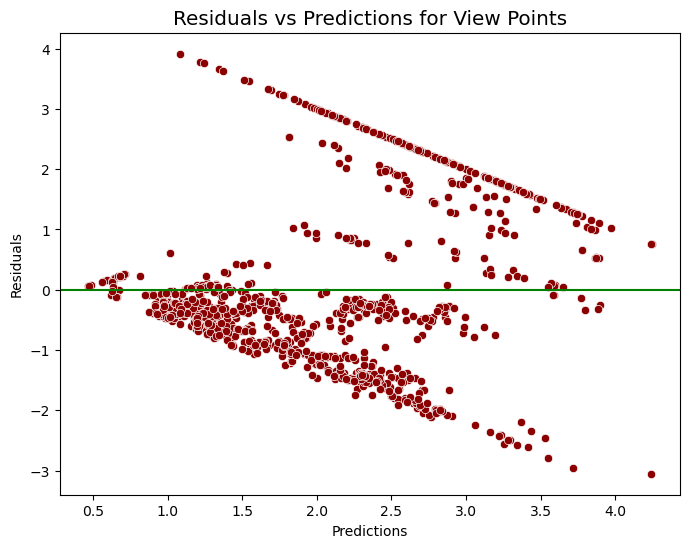

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END .....................................lasso__alpha=1; total time=   0.0s
[CV] END .....................................las

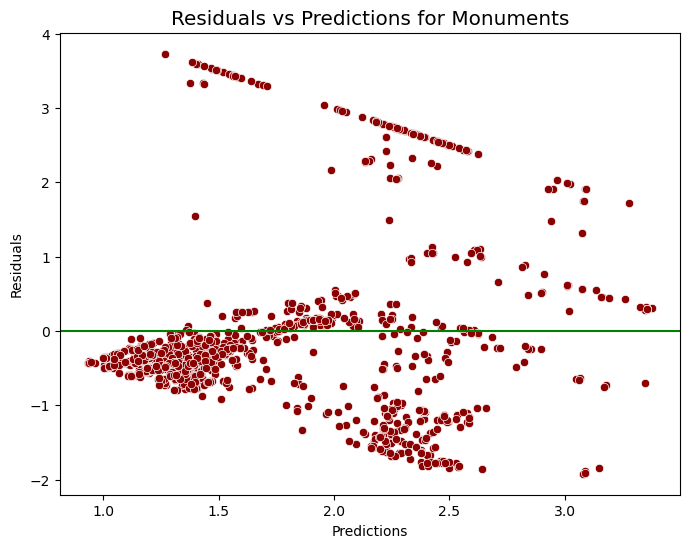

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END .................................lasso__alpha=0.165; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END ...................................lasso__alpha=0.2; total time=   0.0s
[CV] END .....................................lasso__alpha=1; total time=   0.0s
[CV] END .....................................las

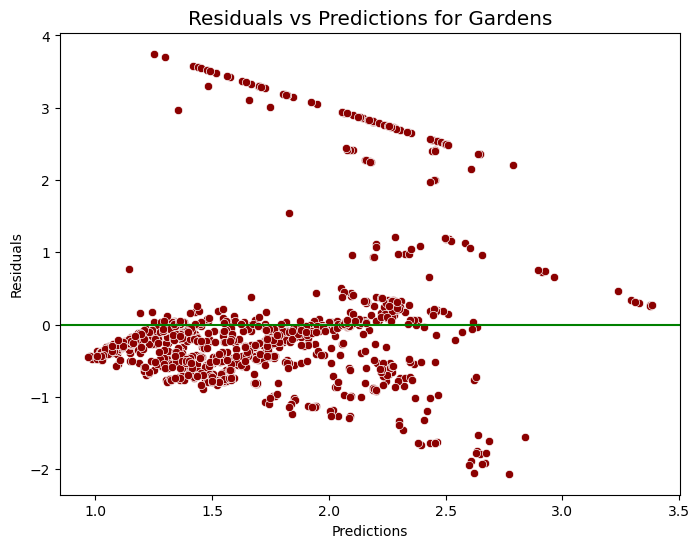

In [170]:
df = pd.read_csv('google_reviews.csv')
df = df[(df != 0).all(axis=1)]
#df = df.drop(columns = ['User'])
df['local services'] = pd.to_numeric(df['local services'], errors='coerce')
df = df[df['local services'].notna()]

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

# List of categories
categories = ['churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums',
       'malls', 'zoo', 'restaurants', 'pubs/bars', 'local services',
       'burger/pizza shops', 'hotels/other lodgings', 'juice bars',
       'art galleries', 'dance clubs', 'swimming pools', 'gyms', 'bakeries',
       'beauty & spas', 'cafes', 'view points', 'monuments', 'gardens']


# Loop through each category
for category in categories:
    # Train-test split
    features = df.drop(columns=[category, 'User']).dropna()
    X_train, X_test, y_train, y_test = train_test_split(features, df[category], test_size=0.3, random_state=101)
    
    # StandardScaler and Lasso
    scaler = StandardScaler()
    lasso_model = Lasso(max_iter=10000)
    
    # Pipeline with scaler and Lasso
    operations = [('scaler', scaler), ('lasso', lasso_model)]
    pipe = Pipeline(operations)
    
    # Parameter grid for GridSearchCV (hyperparameter tuning for alpha)
    param_grid = {
        'lasso__alpha': [ 0.165, 0.2, 1],
    }
    
    # GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    # Get best parameters and predictions
    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_test)

    feature_names = features.columns  # Get the column names

    lasso_model_best = best_model.named_steps['lasso']
    lasso_coefficients = lasso_model_best.coef_

    # Print out the feature names and their corresponding Lasso coefficients
    for feature, coef in zip(feature_names, lasso_coefficients):
        print(f"Feature: {feature}, Coefficient: {coef}")



    
    # Calculate residuals
    residuals = y_test - predictions
    
    # Create a new figure for each plot
    plt.figure(figsize=(8, 6))
    
    # Scatterplot for predictions vs residuals
    sns.scatterplot(x=predictions, y=residuals, color = 'darkred')
    
    # Set plot title and labels
    plt.title(f'Residuals vs Predictions for {category.title()}', fontsize = 'x-large')
    plt.axhline(y = 0, color = 'g', linestyle = '-') 
    plt.xlabel('Predictions')
    plt.ylabel('Residuals')
    
    # Print the mean absolute error
    print(f'Mean Absolute Error for {category}: {sum(abs(residuals)) / len(residuals)}')
    
    # Show the plot
    plt.show()


In [89]:
len(df)

3724

In [131]:
google_reviews = pd.read_csv('google_reviews.csv')
google_reviews = google_reviews[(google_reviews != 0).all(axis=1)]
google_reviews = google_reviews.drop(columns = ['User'])
google_reviews['local services'] = pd.to_numeric(google_reviews['local services'], errors='coerce')
google_reviews = google_reviews[google_reviews['local services'].notna()]


<Axes: >

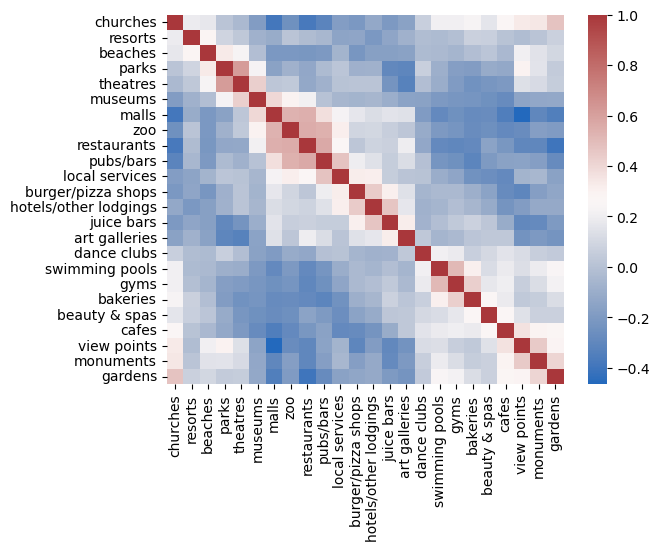

In [137]:
correlation_matrix = google_reviews.corr()
sns.heatmap(correlation_matrix, cmap = 'vlag')

In [139]:
google_reviews

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
68,0.83,0.78,0.82,0.85,3.85,5.00,2.93,2.92,2.82,2.83,...,1.33,1.35,0.55,0.58,0.53,0.50,0.75,0.73,0.72,0.73
69,0.76,0.82,0.83,5.00,3.86,5.00,2.94,2.91,2.82,2.41,...,1.31,1.33,1.36,0.58,0.52,0.50,0.52,0.75,0.73,0.74
70,0.77,0.83,0.84,0.86,3.87,5.00,5.00,2.91,2.81,2.81,...,1.30,1.32,1.34,0.58,0.52,0.51,0.53,0.76,0.74,0.77
71,0.85,0.84,0.85,0.88,3.87,2.94,5.00,2.91,2.80,2.80,...,1.28,1.30,0.58,0.58,0.53,0.51,0.53,0.78,0.76,0.80
72,0.80,0.86,0.87,0.90,3.88,5.00,2.92,2.90,2.79,2.79,...,1.27,1.29,0.57,0.59,0.53,0.52,0.53,5.00,0.77,0.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,...,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.00,5.00,1.56
5452,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,...,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.00,5.00,1.09
5453,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,...,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.00,5.00,1.11
5454,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,0.98,...,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.00,5.00,1.12


In [145]:
from pandas.plotting import parallel_coordinates
google_reviews = pd.read_csv('google_reviews.csv')
google_reviews = google_reviews[(google_reviews != 0).all(axis=1)]
google_reviews['local services'] = pd.to_numeric(google_reviews['local services'], errors='coerce')
google_reviews = google_reviews[google_reviews['local services'].notna()]


plt.figure(figsize=(8, 4))
parallel_coordinates(google_reviews, class_column='User', colormap=plt.get_cmap("Set1"))

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Parallel Coordinates Plot for Attraction Ratings')
plt.grid(True)
plt.show()

ValueError: Image size of 691x78048 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 800x400 with 1 Axes>

Text(0, 0.5, 'Mean Rating 1-5')

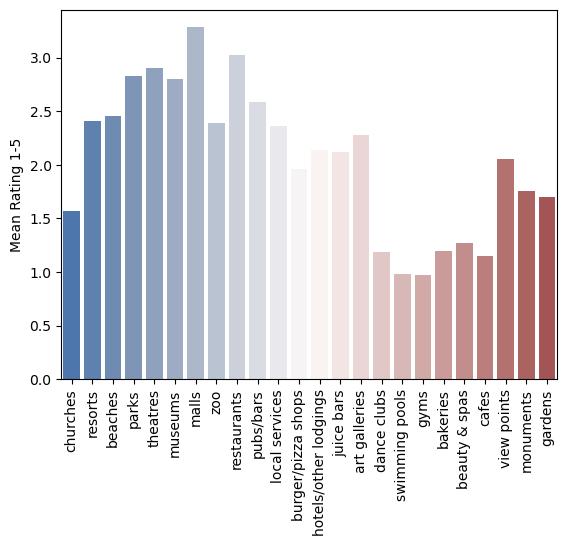

In [152]:
google_reviews = pd.read_csv('google_reviews.csv')
google_reviews = google_reviews[(google_reviews != 0).all(axis=1)]
google_reviews = google_reviews.drop(columns = ['User'])
google_reviews['local services'] = pd.to_numeric(google_reviews['local services'], errors='coerce')
google_reviews = google_reviews[google_reviews['local services'].notna()]


means = google_reviews.mean()
sns.barplot(x=means.index, y=means.values, palette='vlag')
plt.xticks(rotation = 90)
plt.ylabel('Mean Rating 1-5')

/Users/eddyding/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='churches', ylabel='Count'>

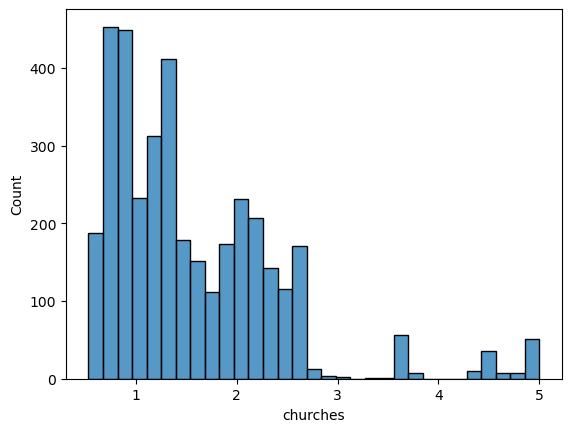

In [169]:
sns.histplot(google_reviews['churches'])

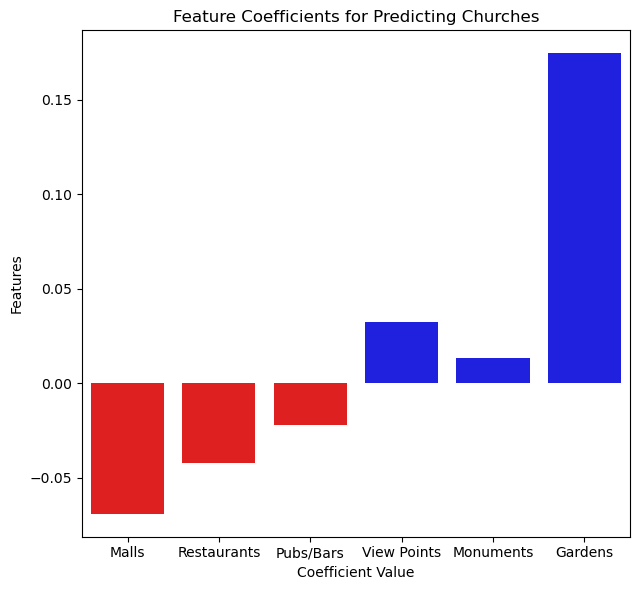

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for the plot
data = {
    'Feature': ['Resorts', 'Beaches', 'Parks', 'Theatres', 'Museums', 'Malls', 'Zoo', 'Restaurants', 'Pubs/Bars', 
               'Local Services', 'Burger/Pizza Shops', 'Hotels/Other Lodgings', 'Juice Bars', 'Art Galleries', 
               'Dance Clubs', 'Swimming Pools', 'Gyms', 'Bakeries', 'Beauty & Spas', 'Cafes', 'View Points', 
               'Monuments', 'Gardens'],
    'Coefficient': [0.0, 0.0, -0.0, -0.0, -0.0, -0.0691, -0.0, -0.0421, -0.0220, -0.0, -0.0, -0.0, -0.0, -0.0, 
                    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0324, 0.0134, 0.1746]
}

# Convert to a DataFrame
df = pd.DataFrame(data)

# Filter out zero coefficients
df_non_zero = df[df['Coefficient'] != 0]

# Set up the color palette based on the sign of the coefficient
colors = ['blue' if c > 0 else 'red' for c in df_non_zero['Coefficient']]

# Set up the plot
plt.figure(figsize=(6.5, 6))
sns.barplot(y='Coefficient', x='Feature', data=df_non_zero, palette=colors)

# Add title and labels
plt.title('Feature Coefficients for Predicting Churches', fontsize )
plt.xlabel('Coefficient Value')
plt.ylabel('Features')

# Show the plot
plt.tight_layout()
plt.show()


In [185]:
google_reviews.iloc[15].sort_values(ascending = False)

view points              5.00
museums                  5.00
parks                    4.65
theatres                 3.96
malls                    2.85
zoo                      2.83
restaurants              2.64
pubs/bars                2.64
local services           1.83
burger/pizza shops       1.21
dance clubs              1.09
hotels/other lodgings    1.07
beaches                  1.07
art galleries            1.07
resorts                  1.06
juice bars               1.06
churches                 1.02
monuments                0.98
gardens                  0.98
swimming pools           0.87
gyms                     0.61
bakeries                 0.59
cafes                    0.59
beauty & spas            0.58
Name: 83, dtype: float64

RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpsftqbrdo d174ba5a1278c3ea3324ab2ddb79f45c.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.26 (TeX Live 2024) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./d174ba5a1278c3ea3324ab2ddb79f45c.tex
LaTeX2e <2024-06-01> patch level 2
L3 programming layer <2024-07-20>
(/Users/eddyding/Library/TinyTeX/texmf-dist/tex/latex/base/article.cls
Document Class: article 2024/02/08 v1.4n Standard LaTeX document class
(/Users/eddyding/Library/TinyTeX/texmf-dist/tex/latex/base/size10.clo))

! LaTeX Error: File `type1cm.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.7 \usepackage
               {type1ec}^^M
No pages of output.
Transcript written on tmpsftqbrdo/d174ba5a1278c3ea3324ab2ddb79f45c.log.




<Figure size 640x480 with 1 Axes>

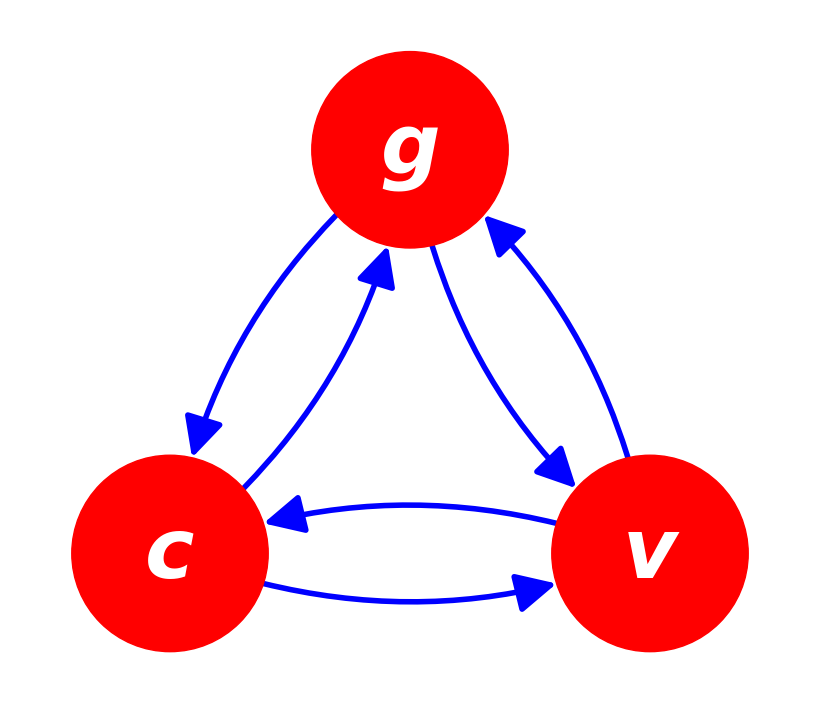

In [269]:
import networkx as nx
import matplotlib.pyplot as plt
plt.rcdefaults()
plt.figure(figsize=(8, 7))
g = nx.DiGraph()
g.add_nodes_from(['g', 'c', 'v'])
g.add_edge('c','v')
g.add_edge('v','c')

g.add_edge('v','g')
g.add_edge('g','v')

g.add_edge('c','g')
g.add_edge('g','c')

pos = {
    'c': (0, 0),        # Bottom-left
    'v': (0.6, 0),      # Bottom-right, closer to 'c'
    'g': (0.3, 0.519)   # Top, closer to 'c' and 'v'
}

node_colors = ['red', 'red', 'red']  # Custom colors for each node

plt.rcParams['font.style'] = 'italic' 
# Draw the graph with node labels and custom node colors
nx.draw(g, pos, with_labels=True, node_color=node_colors, node_size=20000, font_size=60, font_weight='bold', arrowsize=60, 
        connectionstyle='arc3, rad=0.2', edge_color='blue', font_color='white', width=4)  # Curved edges


# Draw edge labels (letter weights)
edge_labels = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels)
plt.xlim(-0.2, 0.8)  # Adjust x-axis limits
plt.ylim(-0.2, 0.7)  # Adjust y-axis limits


# Show the plot
plt.show()


In [273]:
y = 0
for x in range(1, 3000):
    list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    from random import sample
    mySample = sample(list, 4)
    
    x = 0
    for i in mySample:
        if i in [1, 2, 3, 4]:
            x += 1
    
    print(x)
    y += x

print(y / 3000)
    

2
2
2
1
1
3
2
2
2
1
1
1
2
2
1
0
3
2
3
1
0
1
1
0
2
2
2
2
2
1
1
1
1
2
3
3
1
2
2
1
1
2
2
1
2
1
1
2
1
3
2
2
1
2
3
2
1
0
3
2
1
2
2
2
2
1
2
1
1
1
1
1
1
1
1
1
1
2
3
0
2
2
2
2
3
2
3
2
2
3
2
3
1
2
1
1
2
2
2
2
2
1
2
1
2
0
1
1
1
2
0
1
1
2
3
2
1
1
1
1
2
1
1
0
2
1
1
1
2
1
1
2
1
0
2
1
2
0
1
1
0
2
1
2
2
2
1
2
1
1
0
1
1
0
1
2
0
3
1
4
2
2
2
1
2
3
2
2
1
2
3
3
2
1
1
2
2
2
2
2
1
3
3
1
2
2
0
1
1
1
0
2
0
0
2
2
1
3
1
2
1
1
1
1
0
3
2
2
1
1
2
3
1
2
1
1
3
1
3
1
2
3
0
0
3
1
2
1
2
2
3
1
2
1
2
2
2
4
1
1
2
1
2
2
1
2
1
1
1
2
1
0
3
2
3
1
2
1
2
2
2
2
1
2
2
2
1
2
1
1
2
2
1
2
1
1
2
2
2
2
2
1
1
2
1
2
2
2
1
2
2
2
2
2
1
2
0
2
2
2
2
2
1
2
1
2
2
3
2
3
2
2
1
1
2
2
1
1
1
2
1
1
1
3
1
1
1
1
2
3
2
1
2
3
2
0
0
2
1
1
1
2
1
3
0
2
3
3
2
1
3
3
1
2
2
2
3
1
2
2
3
1
1
1
2
3
1
2
2
2
3
1
3
1
1
2
2
2
1
3
2
2
1
3
2
0
2
2
2
2
0
2
1
1
1
1
2
2
1
2
2
2
2
1
2
2
1
2
2
2
1
2
2
1
3
1
0
3
0
3
1
1
1
0
3
2
3
2
3
1
2
1
1
3
1
2
2
2
2
1
2
4
1
2
1
1
2
0
2
2
1
2
1
2
2
1
2
1
1
1
3
1
2
1
3
1
1
2
3
2
2
2
2
1
2
1
1
2
1
1
0
1
1
2
2
1
2
2
1
2
0
0
4
2
1
2
1
1
3
0
